#### Note
Certaines fonctions présentées ici sont fournies sous forme de **squelettes**. Elles indiquent les entrées/sorties et la logique attendue, mais l'implémentation et volontairement masquée pour des raisons pédagogiques ou de confidentialité.

#### Importation des bibliothèques 

In [1]:
import pandas as pd
import geopandas as gpd
import osmnx as ox
import numpy as np
import folium
import glob
import os
import time
from tqdm import tqdm
from shapely import wkt
from osgeo import gdal, ogr, osr
from pyproj import Transformer
from geopy.geocoders import Nominatim
from folium import Icon, Marker
gdal.UseExceptions()

#### Extraction des infrastructures de transport
Cette section extrait les données suivants
- Stations-service existantes;
- Routes principales et primaires
Afin de distinguer les routes `trunk`(routes principales) et `primary`(routes primaires), nous remplaçons les valeurs de la colonnes `amenity` par 2 pour les 2 pour `trunk` et 1 pour `primary`. Cela permet de faciliter la distinction lors des traitements.
- Gares routières
Les infrasctructures téléchargées sont suavegardées au format GeoJson

In [2]:
def extract_transport_infrastructures(country: str) -> None:
   pass

In [3]:
# Appel de la fonction d'extraction
country = 'Senegal'             # place = 'Senegal'
extract_transport_infrastructures(country)

#### Exploration visuelle des infrastructures de transport et de services
Cette section consiste à lire et visualiser les données des infrastructures de transport précédemment enregistrées.

**Visualisation statique des gares routières: echantillons et aperçu global**

element          id      amenity  bus                       name  \
0    node   560521498  bus_station  yes  Gare Routière de Colobane   
1    node  1158233800  bus_station  yes  Terminus DDD Guediawaye I   
2    node  1160208379  bus_station  yes          Terminus ligne 24   
3    node  1669543692  bus_station  yes           Terminus bus 121   
4    node  1770552537  bus_station  yes                       None   

  public_transport source   ref operator name:fr  ... bench opening_hours  \
0          station   None  None     None    None  ...  None          None   
1          station   None  None     None    None  ...  None          None   
2          station   None  None     None    None  ...  None          None   
3          station   None  None     None    None  ...  None          None   
4          station   None  None     None    None  ...  None          None   

  alt_name building access surface barrier capacity  type  \
0     None     None   None    None    None     None  None   
1     None     None   None    None    None     None  None   
2     None     None   None    None    None     None  None   
3     None     None   None    None    None     None  None   
4     None     None   None    None    None     None  None   

                     geometry  
0   POINT (-17.4429 14.69733)  
1  POINT (-17.38922 14.77277)  
2  POINT (-17.38951 14.77406)  
3  POINT (-17.45561 14.74458)  
4  POINT (-17.40238 14.74361)  

[5 rows x 30 columns]

<Axes: >

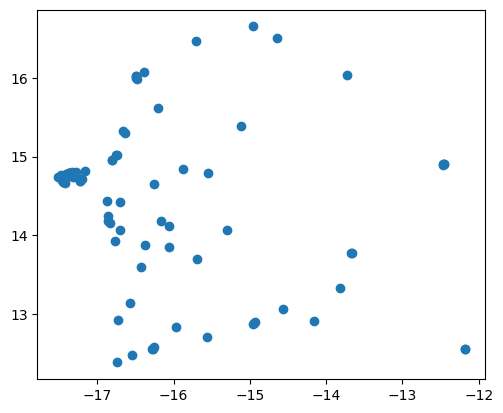

In [4]:
bus_station = gpd.read_file('./Data/senegal_bus_stations.geojson')
display(bus_station.head(5), bus_station.plot())

**Visualisation statique des routes: echantillons et aperçu global**

/home/lamine/anaconda3/envs/pcraster_env/lib/python3.9/site-packages/pyogrio/raw.py:198: RuntimeWarning: Several features with id = 23084240 have been found. Altering it to be unique. This warning will not be emitted anymore for this layer
  return ogr_read(


element       id  highway source                             name bicycle  \
0     way  8113165        1   None                             None    None   
1     way  8115724        2   None       Route de la Corniche Ouest    None   
2     way  8116246        1   None                             None    None   
3     way  8116411        1   None  Boulevard Sheikh Bethio Thioune    None   
4     way  8116663        2   None                             None    None   

  horse junction oneway  surface  ... itinerary source:old_name  \
0  None     None    yes  asphalt  ...      None            None   
1  None     None    yes  asphalt  ...      None            None   
2  None     None     no  asphalt  ...      None            None   
3  None     None    yes  asphalt  ...      None            None   
4  None     None    yes  asphalt  ...      None            None   

  maxweight:signed shoulder sidewalk:right oneway:bus  date survey bus_bay  \
0             None     None           None       None  None   None    None   
1             None     None           None       None  None   None    None   
2             None     None           None       None  None   None    None   
3             None     None           None       None  None   None    None   
4             None     None           None       None  None   None    None   

                                            geometry  
0  LINESTRING (-17.46656 14.71786, -17.46665 14.7...  
1  LINESTRING (-17.50048 14.72625, -17.50052 14.7...  
2  LINESTRING (-17.45304 14.75607, -17.45305 14.7...  
3  LINESTRING (-17.48142 14.70994, -17.48134 14.7...  
4  LINESTRING (-17.1813 14.7211, -17.18155 14.721...  

[5 rows x 68 columns]

<Axes: >

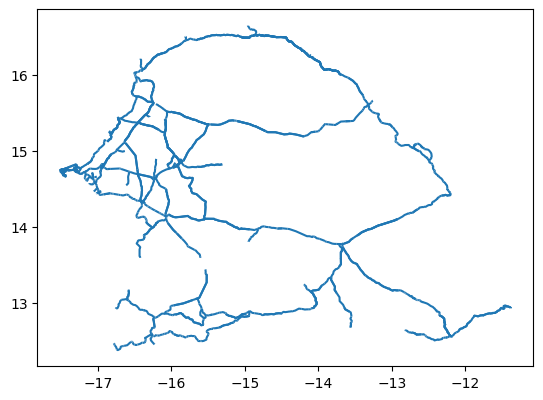

In [5]:
roads = gpd.read_file('./Data/senegal_roads.geojson')
display(roads.head(5), roads.plot())

**Visualisation static des stations-service existantes: echantillons et aperçu global**

element          id amenity          brand brand:wikidata  \
0    node   554844001    fuel           None           None   
1    node   554910383    fuel           None           None   
2    node   565522026    fuel           None           None   
3    node  1241329968    fuel        Oilibya       Q7081491   
4    node  1578132431    fuel  TotalEnergies        Q154037   

         brand:wikipedia       name check_date source alt_name:ar  ... layer  \
0                   None       None        NaT   None        None  ...  None   
1                   None       None        NaT   None        None  ...  None   
2                   None  Oil Lybia        NaT   None        None  ...  None   
3             en:Oilibya    Oilibya        NaT   None        None  ...  None   
4  fr:Total (entreprise)      Total        NaT   None        None  ...  None   

  fuel:biodiesel landuse smoking fuel:lpg bureau_de_change car_wash  food  \
0           None    None    None     None             None     None  None   
1           None    None    None     None             None     None  None   
2           None    None    None     None             None     None  None   
3           None    None    None     None             None     None  None   
4           None    None    None     None             None     None  None   

  fuel:octane_80                    geometry  
0           None  POINT (-17.43136 14.67336)  
1           None  POINT (-17.42677 14.67103)  
2           None  POINT (-17.43908 14.66535)  
3           None  POINT (-17.46927 14.70074)  
4           None  POINT (-16.49189 16.02263)  

[5 rows x 62 columns]

<Axes: >

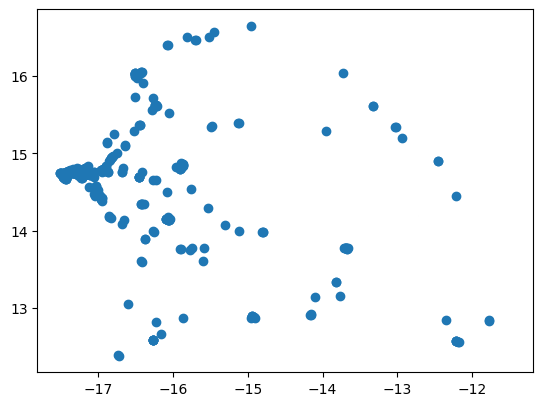

In [6]:
service_stations = gpd.read_file('./Data/senegal_service_stations.geojson')
display(service_stations.head(5), service_stations.plot())

#### Définition d'une fonction récupération des metadonnées des rasters

In [7]:
# Fonction pour l'affichage des metadonnées du raster
def raster_properties(input_path): # Affichier les proprietés pour chaque fichier
    if not os.path.exists(input_path):
        raise FileNotFoundError(f"Fichier introuvable")
    # Lecture du raster
    raster = gdal.Open(input_path)
    # Chemin vers le fichier
    path = raster.GetDescription()
    # Largeur du raster
    width = raster.RasterXSize
    # Hauteur du raster
    height = raster.RasterYSize
    # Système de projection du raster
    projection = raster.GetProjection()
    # Géotrasnformation du raster
    geotransform = raster.GetGeoTransform()
    # les metadonnées
    metadata = raster.GetMetadata()
    # le nombre de bandes
    numband = raster.RasterCount 
    # Acceder à la bande 1
    band = raster.GetRasterBand(1)
    # Type de données dans la bande
    data_type = band.DataType
    data_type_name = gdal.GetDataTypeName(data_type)

    # Driver du raster
    driver = raster.GetDriver().ShortName
    print("#############################################")
    print('Propriétés')
    print(f"Le type de données de la bande 1: {data_type_name}")
    print(f"{path} a {width} x {height} comme dimension")
    print(f"Driver: {driver}")
    print(f"Nombre de bande: {numband}")
    print(f"Les metadonnées: {metadata}")

    srs = osr.SpatialReference() 
    srs.ImportFromWkt(projection)
    epsg_code = srs.GetAuthorityCode(None)
    # Unité de la projection
    unit_name = "Degree" if epsg_code == "4326" else srs.GetLinearUnitsName()
    # Valeur unitaire
    unit_value = srs.GetLinearUnits()
    print(f"Unité de la projection: {unit_name} {unit_value}")

    if geotransform:
        print(f"Origine: ({geotransform[0]}, {geotransform[3]})")
        print(f"Size: ({geotransform[1]} {unit_name}, {geotransform[5]} {unit_name})")
    layerBand = raster.GetRasterBand(1)
    min_value, max_value = layerBand.ComputeRasterMinMax()
    print(f"Valeur minimale {min_value}")
    print(f"Valeur maximale {max_value}")
    print("#############################################")
    raster = None

In [8]:
# Passer les fichiers Geotiff en paramètres de la fonction raster_properties
raster_paths = glob.glob('./Data/*.tif') # Charger les fichiers geotiff
for path in raster_paths:
    
    raster_properties(path)
    print('\n')

#############################################
Propriétés
Le type de données de la bande 1: Byte
./Data/senegal_landcover.tif a 6885 x 4882 comme dimension
Driver: GTiff
Nombre de bande: 1
Les metadonnées: {'AREA_OR_POINT': 'Area'}
Unité de la projection: Degree 1.0
Origine: (-17.530697714143344, 16.692829022060735)
Size: (0.0008983152841195215 Degree, -0.0008983152841195215 Degree)
Valeur minimale 0.0
Valeur maximale 95.0
#############################################


#############################################
Propriétés
Le type de données de la bande 1: Float32
./Data/population_density.tif a 6729 x 4886 comme dimension
Driver: GTiff
Nombre de bande: 1
Les metadonnées: {'AREA_OR_POINT': 'Area'}
Unité de la projection: metre 1.0
Origine: (224744.567928211, 1849148.8736698963)
Size: (100.0 metre, -100.0 metre)
Valeur minimale 0.0
Valeur maximale 44923.82421875
#############################################





c. Alignement des rasters

Pour une cohérence spatiales, une interopérabilité entre les données et une optimisation des calculs, on va aligner nos rasters sur une même grille, avec:

- une projection commune(EPSG:32628 - UTM Zone 28N)
- Une résolution fixe (100m). Le choix de cette résolution repose sur un compromis entre la capacité de traitement disponible et une précision géographique.
- Une origine spatiale commune bassée sur le MNT Projeté

Etape 1: Reprojection du raster de référence


In [9]:
# Fonction pour la du landcover(référence)
def reproject_raster_get_origin(input_raster: str, 
                                output_raster: str, 
                                target_epsg: int = 32628, 
                                resolution: int = 100
                               ) -> tuple[int, int, int, int, int, str]:
     pass
# Reprojection du landcover et extraction des métadonnées
# Définition des paramètres
# Appel de la fonction reproject_raster_get_origin
#origin_x, origin_y, width, height, resolution, landcover_reprojected = reproject_raster_get_origin(input_raster,
#                                                                                                 output_raster)

Etape 2: Alignement des autres raster

In [10]:
# Fonction qui permet d'aligner les autres rasters sur le raster de référence
def align_raster(input_raster: str, output_raster: str, reference_epsg: int, resolution: int, origin_x: int, origin_y: int,
                 width: int, height: int, resampleAlg: str) -> None:
    
   pass
# Alignement des autres rasters(origine, width, height, resolution, crs)

# Transmettre les paramètres à la fonction align_raster

#### Rasteriser les routes, les gares routières et les stations-service
Convertir les données vectorielles des routes, stations-service et gares routières en données raster pour un analyse spatiale.

In [11]:
def rasterize_vector(vector_path: str, output_path: str, ref_path: str, vector_type: str, burn_value: int = 1) -> None:
   
    # Créer un raster vide
    
    # Définir une projection
    
    # Dfinir une geotransformation
    out_ds.SetGeoTransform(ref_ds.GetGeoTransform())
    # Rasteriser en utilisant la colonne `highway` ou burn_value pour remplir les pixels du raster
    pass

In [12]:
# Définir les paramètres pour chaque vecteur
data = {
    'stations': {
        'input_path': './Data/senegal_service_stations.geojson',               # fichier d'entrée(vecteur)
        'output_path': './Data/Aligned_rasters/senegal_service_stations.tif'   # fichier de sortie(raster)
    },
    'roads': {
        'input_path': './Data/senegal_roads.geojson',
        'output_path': './Data/Aligned_rasters/senegal_roads.tif'
    },

    'bus_station': {
        'input_path': './Data/senegal_bus_station.geojson',
        'output_path': './Data/Aligned_rasters/senegal_bus_stations.tif'
    }
}
ref_path = './Data/Aligned_rasters/senegal_landcover.tif'


Vérifier l'alignement des rasters pour assurer la cohérence géospatiale.

In [13]:
# Vérification de l'alignement rasters
raster_paths = glob.glob('./Data/Aligned_rasters/*.tif') # Charger les fichiers geotiff
for path in raster_paths:
    
    raster_properties(path)
    print('\n')

#############################################
Propriétés
Le type de données de la bande 1: Byte
./Data/Aligned_rasters/senegal_bus_station.tif a 6729 x 4886 comme dimension
Driver: GTiff
Nombre de bande: 1
Les metadonnées: {'AREA_OR_POINT': 'Area'}
Unité de la projection: metre 1.0
Origine: (224744.567928211, 1849148.8736698963)
Size: (100.0 metre, -100.0 metre)
Valeur minimale 0.0
Valeur maximale 1.0
#############################################


#############################################
Propriétés
Le type de données de la bande 1: Byte
./Data/Aligned_rasters/senegal_roads.tif a 6729 x 4886 comme dimension
Driver: GTiff
Nombre de bande: 1
Les metadonnées: {'AREA_OR_POINT': 'Area'}
Unité de la projection: metre 1.0
Origine: (224744.567928211, 1849148.8736698963)
Size: (100.0 metre, -100.0 metre)
Valeur minimale 0.0
Valeur maximale 2.0
#############################################


#############################################
Propriétés
Le type de données de la bande 1: Byte
./Da

#### Normaliser les rasters
la normalisation consiste à transformer les valeurs d'un raster afin de les ramener sur une echelle commune, généralment comprise entre 0 et 1. Cette étape est essentielle lorsque plusieurs couches rasters aux unités différentes doivent être combinées dans une analyse multi-critères.

La normalisation permet ainsi de comparer des variables hétérogènes sur une base équitable et d'éviter qu'une variable à grande échelle n'écrase les autres lors de l'analyse.

In [14]:
# Fonction pour normaliser un critère entre 0 et 1
def normalize(array: np.ndarray) -> np.ndarray:
   pass

#### Sauvegarde d'un array en raster
Une fois le traitement terminé(par example, après une normalisation ou une opération mathématique), les résultats sont souvent sous forme de tableau Numpy(array). Pour pouvoir les utiliser, il est nécessaire de les sauvegarder au format GeoTiff, en conservant les métadonnées spatiales(emprise, résolution, projection)

In [15]:
# Fonction pour convertir un tableau numpy en fichier tiff
def save_array_as_tiff(array, ref_ds, output_path, output_type):
    
    driver = gdal.GetDriverByName('GTiff')
    out_ds = driver.Create(output_path, ref_ds.RasterXSize, ref_ds.RasterYSize, 1, output_type)
    out_ds.SetGeoTransform(ref_ds.GetGeoTransform())
    out_ds.SetProjection(ref_ds.GetProjection())
    out_ds.GetRasterBand(1).WriteArray(array)
    
    # Libérer la mémoire
    out_ds.FlushCache()
    out_ds = None

#### Calcul de distances euclidiennes jusqu'au point le plus proche
Pour évaluer l'accéssibilité spatiale, on calcul la distance euclidienne entre chaque cellule du raster et l'objet d'intérêt(station, route, gare, ect.). Ce calcul permet de quantifier la proximité spatiale indépendamment des obstacles physiques(c'est à dire en ligne droite). Pour chaque infrastructure, un raster binaire est généré.
- les cellules correspondant à un point(station ou gare) prennent la valeur 1, les autres 0.
- Pour les routes: les cellules trunk sont codées 2, celles de primary 1, les autres 0.
Le résultat est un raster où chaque cellule contient la distance(en mètres ou en pixels selon la résolution) jusqu'un point le plus proche du type considéré.

In [16]:
# Fonction pour calculer la distance de proximité depuis un masque
def compute_distance(mask_array: np.ndarray, ref_ds: gdal.Dataset, value: int) -> np.ndarray:
   pass

In [17]:
# Calcul les distances pour les routes
# Succcession des étapes
# Calculer les distances pour les routes(`trunk`, `primary`)
# Inverser les distances (plus proche = plus favorable)
# Pondérer et combiner (ex.trunk = 0.7, primary = 0.3)
# Définir un seuil de proximité minimale des routes
# Créer un masque binaire
# Booléen : True si assez proche
# Transformer en masque 0/1
# Sauvergarder le tableau Numpy au format tiff avec la fonction save_array_as_tiff

In [18]:
# Calculer les distances pour les gares routières
# Inverser les distances (plus proche = plus favorable)
# Sauvergarder le tableau Numpy au format tiff avec la fonction save_array_as_tiff

In [19]:
# Calculer les distances pour les stations(plus proche = moins favorable)
# Mettre à l'échelle les distances de proximité entre les stations 
# Sauvergarder le tableau Numpy au format tiff avec la fonction save_array_as_tiff

In [20]:
# Normaliser le critère population
# Sauvergarder le tableau Numpy au format tiff avec la fonction save_array_as_tiff

In [21]:
"""
Intégrer un facteur d'exclusion basé sur le type de couverture de sol pour choisir les zones favorables à
l'implémentation d'une station
['nodatavalue', 'couverture arborée', 'arbustes', 'prairie', 'terre cultivée', 'construit', 'végétation nue/eparse', 'neige et glace', 'plans d'eau permenant',
        'zone humide et herbacée', 'mangroves', 'mousse et lichen']"""
# Exclure les classes `forêt`, `neige et glace`, `plans d'eau permenant` et les valeurs maquantes
# Sauvergarder le tableau Numpy au format tiff avec la fonction save_array_as_tiff

"\nIntégrer un facteur d'exclusion basé sur le type de couverture de sol pour choisir les zones favorables à\nl'implémentation d'une station\n['nodatavalue', 'couverture arborée', 'arbustes', 'prairie', 'terre cultivée', 'construit', 'végétation nue/eparse', 'neige et glace', 'plans d'eau permenant',\n        'zone humide et herbacée', 'mangroves', 'mousse et lichen']"

#### Pondération globale
Après avoir calculé les distances de proximité, normalisé les autres critères et appliqué un masque binaire(converti en entier) au critère route à l'aide d'un seuil, nous procédons à la pondération globale des autres critères(hors routes), puis multiplier le résultat final par le tableau binaire des routes afin de restreindre la sélection aux zones accessibles.

Les coefficients de pondérations peuvent être ajustées pour refléter différents scénario ou priorité.

In [22]:
populations_score = gdal.Open('./Data/Scores/population_scores.tif')
populations_score_array = populations_score.ReadAsArray()

road_mask = gdal.Open('./Data/Scores/road_mask.tif')
road_mask_array = road_mask.ReadAsArray()

stations_score = gdal.Open('./Data/Scores/station_scores.tif')
stations_score_array = stations_score.ReadAsArray()

landcover_mask = gdal.Open('./Data/Scores/landcover_mask.tif')
landcover_score_array = landcover_mask.ReadAsArray()

bus_station_score = gdal.Open('./Data/Scores/bus_score.tif')
bus_station_score_array = bus_station_score.ReadAsArray()

# Pondération globale
suitability = (
    0.25 * bus_station_score_array +
    0.30 * stations_score_array +
    0.25 * populations_score_array +
    0.20 * landcover_score_array
)
suitability = suitability * road_mask_array                              # 0 si trop loin d'une route
# Suitability est une carte raster de score entre 0 et 1 où
# Toute cellule loin d'un route a une score=0
# Les autres sont évaluées selon la pondération
suitability = np.nan_to_num(suitability, nan=0)
# Enregister vers Geotiff
output_path = './Data/Scores/suitability.tif'
save_array_as_tiff(suitability, landcover_mask, output_path, gdal.GDT_Float32)

#### Sélection des meilleurs emplacements
Après la pondération globale, les n meilleurs emplacements sont extraits en fonction de leurs scores, tout en appliquant une distance minimale de 1 km entre eux, grace à l'application d'un buffer. Ces emplacements représentent les zones les plus adaptées selon les critères définis.

In [23]:
def select_spaced_points(suitability: np.ndarray, min_dist: int, n_points: int) -> list[tuple[float, float]]:
    # liste qui va contenir les indices des points sélectionnés
    # Créer une copie de la carte pour éviter de modifier l'originale
    # Trouver le pixel avec le score le plus élevé dans suitability_copy
    # Masquer une zone autour de ce point, pour ne pas choisir d'autres points trop proches au point séléctionné
    # Exclure cette zone de la carte en lui attribuant une valeur "très faible" (-inf)
    pass

In [24]:
# Récupérer les  indices en pixels n meilleurs_scores
suitability =  gdal.Open('./Data/Scores/suitability.tif')
suitability_array = suitability.ReadAsArray()
resolution = 100   # m/pixel
min_distance = 1000  # m
min_dist_pix = int(min_distance / resolution)
#points = select_spaced_points(suitability_array, min_dist_pix, n_points=50)
#points

#### Récupération des adresses de n meilleurs emplacements
Cette étape consite à convertir les **coordonnées des pixels** sélectionnées en **coordonnées géographiques**, puis à en extraire les adressses physiques à l'aide d'un service de géocodage inverse. le résultat final inclut pour chaque emplacement: **son rang**, **ses coordonnées géographiques** et **son adresse**. L'ensemble est enregistré dans un fichier Excel pour une utilisation futur ou un partage facilité.

In [25]:
# Convertir en coordonnées géographiques
#définition d'une fonction de conversion des coordonnées géographiques en indice de pixel ou inversement
def pixel_to_geo(x, y, geotransform):
  
    def gps_to_utm(lon, lat): #fonction pour convertir les coordonnées projetées en coordonnées geographiques
        transformer_wgs = Transformer.from_crs("EPSG:32628", "EPSG:4326", always_xy=True)
        
        x_proj, y_proj = transformer_wgs.transform(lon, lat)
        return [x_proj, y_proj]
        
    if geotransform: 
       
        #print("Convertir Pixel à Géo")
        x_geo = geotransform[0] + x * geotransform[1]
        y_geo = geotransform[3] + y * geotransform[5]
        x_coord, y_coord = gps_to_utm(x_geo, y_geo)
    
        
    else:
        print("le raster n'a pas de trasnformation")
    return x_coord, y_coord

In [26]:
def geocode_from_pixels(pixel_coords: list[tuple[float, float]]) -> None:
    # Initilisation de Nominatim
    geolocator = Nominatim(user_agent='geopy')
    # Résultats à convertir à un DataFrame
    places = [] 

    """Définir une geotransfomation de référence
    
    Convertir les coordonnées image en coordonnées géographiques
    
    On essaie de récupérer une information significative(village, town, hamlet, city, municipality)
    Enregister le contenu du DataFrame dans un fichier excel pour une utilisation ultérieure
    
    """

    pass
    
    
   



In [27]:
# Exécution de la fonction geocodage_from_pixels
#geocode_from_pixels(points)

<Axes: >

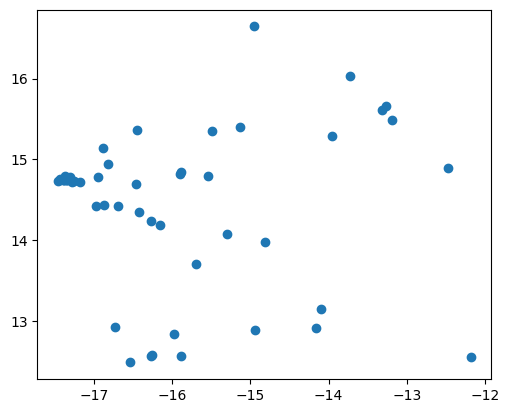

In [28]:
# Créer un GeoDataFrame à partir du fichier Excel récemment créé
df = pd.read_excel('./Data/Results/liste_meilleurs_emplacements_stations_services.xlsx')
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude), crs='EPSG:4326')
gdf.to_file('./Data/senegal_best_locations.geojson')
# Visualisation statique des n meilleurs emplacements pour stations-service
gdf.plot()

#### Visualisation interactive des meilleurs emplacements
A partir du fichier excel contenant les n meilleurs emplamcements(incluant le rang, les coordonnées géographiques et les adresses), un GéoDataFrame est généré pour faciliter la manipulation géospatiale. Ce GéoDataframe est ensuite utilisée pour créer une carte interactive à l'aide de la bibliothèque Folium. Sur cette carte, chaque point représente un emplacement sélectionné enrichi d'un popup affichant son rang, son adresse.

Pour offrir une meilleure lecture spatiale, la carte intègre également
- **les routes**, sous formes de polygones
- **les stations existantes**, représentées par des points distincts(par exemple en rouge)
- **les gares routières**, représenté avec la coleur bleue
Cette visualisation combinée permet d'évaluer visuellement la pertinence des emplacements proposés, en tenant compte du contexte d'accéssibilité et de l'existant.

In [29]:
def layer_visualization(roads, bus_stations, 
                        service_stations, 
                        best_locations,
                        output_file="carte_interactive_meilleurs_emplacements.html"):
    # Centrage de la carte sur le centre de l'ensembke des géométries
    gdf = gpd.GeoDataFrame(pd.concat([roads, bus_stations, service_stations, best_locations], ignore_index=True))
    y = bus_stations.geometry.iloc[0].y
    x = bus_stations.geometry.iloc[0].x
    m = folium.Map(location=[y, x], zoom_start=12)

    # Ajouter les routes
    folium.GeoJson(
        roads,
        name="Routes nationales",
        style_function=lambda x: {'color': 'blue', 'weight': 2}
    ).add_to(m)

    # Ajouter les Stations service existantes
    stations_group = folium.FeatureGroup(name='Stations-service existantes')
    bus_station_group = folium.FeatureGroup(name='Garres routitières')
    best_location_group = folium.FeatureGroup(name='Meilleurs emplacements')
    for row in service_stations.itertuples():
        geom = row.geometry
        if geom.geom_type == "Point":
            lat, lon = geom.y, geom.x
        
            lat, lon = geom.y, geom.x
            station_popup = f"""
                <b>Nom : </b> {getattr(row, 'name', 'Non renseigné')}<br>
                <b>Opérateur : </b> {getattr(row, 'operator', 'Non précisé')}<br>
                <b>Amenity : </b> {getattr(row, 'amenity', 'N/A')}<br>
            """
            folium.CircleMarker(
                location=[lat, lon],
                radius=3,
                color='red',
                fill=True,
                fill_opacity=0.7,
                popup=station_popup
                
            ).add_to(stations_group)
    stations_group.add_to(m)

    # Ajouter les garres routières
   
    for row in bus_stations.itertuples():
        geom = row.geometry
        if geom.geom_type == "Point":
            lat, lon = geom.y, geom.x
            bus_station_popup = f"""
                <b>Nom : </b> {getattr(row, 'name', 'Non renseigné')}<br>
               
                <b>Amenity : </b> {getattr(row, 'amenity', 'N/A')}<br>
            """
            folium.CircleMarker(
                location=[lat, lon],
                radius=3,
                color='blue',
                fill=True,
                fill_opacity=0.7,
                popup=bus_station_popup
                
            ).add_to(bus_station_group)
    bus_station_group.add_to(m)

    # Ajouter les meilleurs emplacements pour station de service
    
    for row in best_locations.itertuples():
        geom = row.geometry
        if geom.geom_type == "Point":
            lat, lon = geom.y, geom.x
            best_location_popup = f"""
                <b>Rang : </b> {getattr(row, 'Rang', 'Non renseigné')}<br>
                <b>Adresse : </b> {getattr(row, 'Adresse', 'Non précisé')}<br>
                
            """
            folium.CircleMarker(
                location=[row.geometry.y, row.geometry.x],
                radius=3,
                color='green',
                fill=True,
                fill_opacity=0.9,
                popup=best_location_popup,
                #icon=Icon(color='green', icon_color='green', icon='car', prefix='fa')
                
            ).add_to(best_location_group)
    best_location_group.add_to(m)

    # Couches de contrôle
    folium.LayerControl(collapsed=False).add_to(m)

    # Sauvegarder
    m.save(output_file)
    print(f'Carte sauvegarder sous: {output_file}')
    return m

In [30]:
# Importer les routes
roads = gpd.read_file('./Data/senegal_roads.geojson')
roads = roads[['name', 'geometry']]   

# Importer les stations de services
service_stations = gpd.read_file('./Data/senegal_service_stations.geojson')
service_stations= service_stations[['name', 'operator', 'amenity', 'geometry']]

# Importer les garres routières
bus_stations = gpd.read_file('./Data/senegal_bus_station.geojson')
bus_stations = bus_stations[['name', 'amenity', 'geometry']]

# Importer les meilleurs emplacements
best_locations = gpd.read_file('./Data/senegal_best_locations.geojson')
best_locations = best_locations[['Rang', 'Adresse', 'geometry']]

/home/lamine/anaconda3/envs/pcraster_env/lib/python3.9/site-packages/pyogrio/raw.py:198: RuntimeWarning: Several features with id = 23084240 have been found. Altering it to be unique. This warning will not be emitted anymore for this layer
  return ogr_read(


In [31]:
m = layer_visualization(roads, bus_stations, service_stations, best_locations)
m

Carte sauvegarder sous: carte_interactive_meilleurs_emplacements.html
